<a href="https://colab.research.google.com/github/BluessyJazz/Programacion-Para-Ingenieria_2024-1/blob/main/SI05%20GeoPandas%20SciPy/BEDOYAa_SI05_v20240516.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## «*Quien no se mueve, no siente las cadenas*».
### [Rosa de Luxemburgo](https://es.wikipedia.org/wiki/Rosa_Luxemburgo)

# SI05 GeoPandas SciPy

Actividad individual.

Utilice el dataset asignado en [datasets geopandas](https://docs.google.com/spreadsheets/d/e/2PACX-1vR3xU0NkXVW-ZzKwygg0QecuJRhA2ssj-t67tN3inRTHUcPbeZFONbTevZfc7k7YtmTeR-O-LrsDkee/pubhtml).

Resuelva los siguientes ejercicios con códigos que se ajusten al PEP8. Recuerde incluir los comentarios en el código y documentar las funciones con docstrings al estilo de Google.

**Importante:**

**no se permite la utilización de ciclos (for or while) para resolver los ejercicios.**

**todos los ejercicios deben ser resueltos con Pandas.**

# Instalar GeoPandas

GeoPandas no es una librería nativa de Python por lo que **requiere ser instalada antes de ser invocada**.


In [24]:
# Instalar GeoPandas
%pip install geopandas

Note: you may need to restart the kernel to use updated packages.


# Preparación del ejercicio

*   Importe las librerías requeridas
*   Lea el dataset a utilizar, **UNA SOLA VEZ**, desde una url y utilice esa información para resolver los ejercicios indicados

Sugerencia: suba el dataset a Googledrive y luego publíquelo como página web. El siguiente enlace le indica cómo hacerlo: [Cómo publicar archivos de Documentos, Hojas de cálculo, Presentaciones y Formularios de Google](https://support.google.com/docs/answer/183965?hl=es-419&co=GENIE.Platform%3DDesktop).

Nota: si lo desea puede utilizar otro método para obtener la url del dataset.



In [1]:
try:
    # Importar las librerías necesarias
    # - requests: Librería para realizar solicitudes HTTP en Python
    # - os: Proporciona una forma de usar la funcionalidad dependiente del
    # sistema operativo
    # - numpy: Librería para trabajar con arreglos de datos de manera eficiente
    # - pandas: Librería de manipulación y análisis de datos de código abierto
    # - geopandas: Extensión de pandas para trabajar con datos geoespaciales
    import requests
    import os
    import numpy as np
    import pandas as pd
    import geopandas as gpd

    # Verificar librerias necesarias
    # En caso de no estar instaladas, se instalarán
    # - matplotlib: Librería para la creación de gráficos y visualizaciones
    # - folium: Librería para crear mapas interactivos
    # - colorama: Librería para darle color a los textos impresos en consola
    # - gdown: Librería para descargar archivos de Google Drive
    try:
        # Importar la libreria completa para mostrar su versión
        import matplotlib
        from matplotlib import pyplot as plt
    except ImportError:
        %pip install matplotlib
        # Importar la libreria completa para mostrar su versión
        import matplotlib
        from matplotlib import pyplot as plt

    try:
        import folium
    except ImportError:
        %pip install folium
        import folium

    try:
        import scipy
    except ImportError:
        %pip install scipy
        import scipy
    
    try:
        # Importar la libreria completa para mostrar su versión
        import colorama
        from colorama import Fore, Style
    except ImportError:
        %pip install colorama
        # Importar la libreria completa para mostrar su versión
        import colorama
        from colorama import Fore, Style

    try:
        import gdown
    except ImportError:
        %pip install gdown
        import gdown


    # Conocer la versiones de las librerías instaladas
    print("\033[3m" + "\033[1m" + Fore.RED +
            "Versión de requests: " + Style.RESET_ALL +
            requests.__version__)

    print("\033[3m" + "\033[1m" + Fore.RED +
            "Versión de numpy: " + Style.RESET_ALL +
            np.__version__)

    print("\033[3m" + "\033[1m" + Fore.RED +
            "Versión de matplotlib: " + Style.RESET_ALL +
            matplotlib.__version__)
    
    print("\033[3m" + "\033[1m" + Fore.RED +
            "Versión de pandas: " + Style.RESET_ALL +
            pd.__version__)

    print("\033[3m" + "\033[1m" + Fore.RED +
            "Versión de scipy: " + Style.RESET_ALL +
            scipy.__version__)

    print("\033[3m" + "\033[1m" + Fore.RED +
            "Versión de geopandas: " + Style.RESET_ALL +
            gpd.__version__)

    print("\033[3m" + "\033[1m" + Fore.RED +
            "Versión de folium: " + Style.RESET_ALL +
            folium.__version__)

    print("\033[3m" + "\033[1m" + Fore.RED +
            "Versión de colorama: " + Style.RESET_ALL +
            colorama.__version__)

    print("\033[3m" + "\033[1m" + Fore.RED +
            "Versión de gdown: " + Style.RESET_ALL +
            gdown.__version__)


    # Guardar en la variable 'ruta' la url del dataset
    ruta = "https://github.com/BluessyJazz/Programacion-Para-Ingenieria_2024-1/blob/main/SI05%20GeoPandas%20SciPy/Municipios.json?raw=true"

    # Ruta donde se guardará el archivo
    file_path = "Municipios.json"

    # Descargar el archivo solo si no existe
    if not os.path.exists(file_path):
        response = requests.get(ruta)
        response.raise_for_status()

        # Guardar el archivo en la máquina local
        with open(file_path, 'w') as f:
            f.write(response.text)

    # Leer el archivo JSON en un GeoDataFrame
    mun_col = gpd.read_file(file_path)

except FileNotFoundError as e:
    print("\033[3m" + "\033[1m" + Fore.RED + 
          "Error: " + Style.RESET_ALL + 
          "No se encontró el archivo.")
    print(e)

except ImportError as e:
    print("\033[3m" + "\033[1m" + Fore.RED + 
          "Error: " + Style.RESET_ALL + 
          "No se pudo importar la librería necesaria.")
    print(e)
except Exception as e:
    print("\033[3m" + "\033[1m" + Fore.RED + 
          "Error: " + Style.RESET_ALL + 
          "No se pudo cargar el dataset.")
    print(e)
    
# Verificar la lectura del dataset
print("\033[3m" + "\033[1m" + Fore.GREEN +
        "Dataset:" + Style.RESET_ALL)

# Mostrar las primeras 5 filas del dataset
mun_col.head()


Versión de requests: 2.31.0
Versión de numpy: 1.26.4
Versión de matplotlib: 3.9.0
Versión de pandas: 2.2.2
Versión de scipy: 1.13.0
Versión de geopandas: 0.14.4
Versión de folium: 0.16.0
Versión de colorama: 0.4.6
Versión de gdown: 5.2.0
Dataset:


,DPTOMPIO,DPTO_CCDGO,MPIO_CCDGO,MPIO_CNMBR,MPIO_CCNCT,geometry
0,05001,05,001,MEDELLÍN,05001,"POLYGON ((-75.66873 6.37318, -75.66888 6.37329..."
1,05002,05,002,ABEJORRAL,05002,"POLYGON ((-75.41645 5.90108, -75.41690 5.90064..."
2,05004,05,004,ABRIAQUÍ,05004,"POLYGON ((-76.01161 6.64726, -76.01193 6.64741..."
3,05021,05,021,ALEJANDRÍA,05021,"POLYGON ((-74.98189 6.38306, -74.98201 6.38313..."
4,05030,05,030,AMAGÁ,05030,"POLYGON ((-75.67424 6.08270, -75.67463 6.08258..."


## Ejercicio 00

Muestre las principales características del dataset utilizando pandas.

En particular muestre los nombres de las columnas y sus tipos; el índice del dataset; la forma del dataset.

In [26]:
# Mostrar las columnas y sus tipos
print("\033[3m" + "\033[1m" + Fore.GREEN +
        "Columnas y tipos:" + Style.RESET_ALL)
print(mun_col.dtypes)

# Mostrar el índice del dataset
print("\n" + "\033[3m" + "\033[1m" + Fore.GREEN +
        "Índice:" + Style.RESET_ALL)
print(mun_col.index)

# Mostrar la forma del dataset
print("\n" + "\033[3m" + "\033[1m" + Fore.GREEN +
        "Forma:" + Style.RESET_ALL)
print(mun_col.shape)


Columnas y tipos:
DPTOMPIO        object
DPTO_CCDGO      object
MPIO_CCDGO      object
MPIO_CNMBR      object
MPIO_CCNCT      object
geometry      geometry
dtype: object

Índice:
RangeIndex(start=0, stop=1121, step=1)

Forma:
(1121, 6)


## Ejercicio 01

Ubique en un mapa las coordenadas de los puntos contenidos en el dataset.

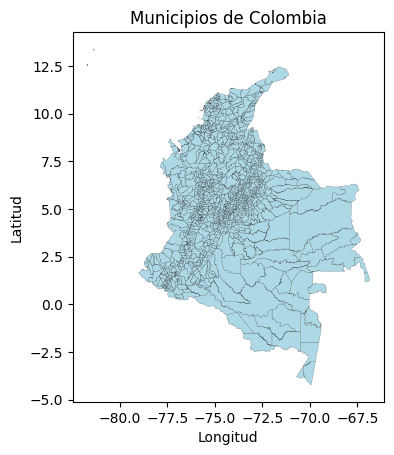

In [27]:
# Crear una figura y un eje
fig, ax = plt.subplots()

# Dibujar los puntos en el mapa
mun_col.plot(ax=ax, color='lightblue', edgecolor='black', linewidth=0.1)

# Añadir un título y etiquetas a los ejes
ax.set_title('Municipios de Colombia')
ax.set_xlabel('Longitud')
ax.set_ylabel('Latitud')

# Mostrar el mapa
plt.show()

In [ ]:
import folium

# Crea un mapa centrado en Colombia
m = folium.Map(location=[4.5709, -74.2973], zoom_start=5)

# Agrega los datos al mapa
folium.GeoJson(mun_col).add_to(m)

# Muestra el mapa
m

## Ejercicio 02

Ubique en un mapa los cinco puntos más alejados del centro del dataset.

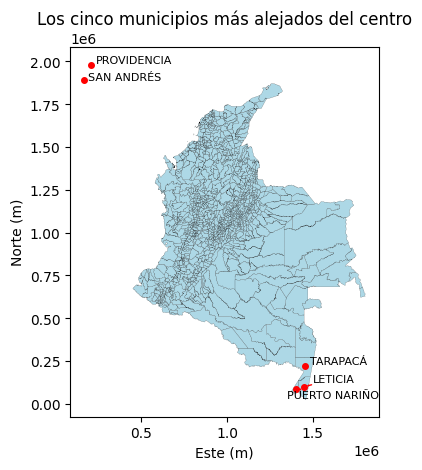

In [7]:
# Proyectar a un CRS proyectado
mun_col_crs = mun_col.to_crs("EPSG:3116")

# Calcular el centro del conjunto de datos
center = mun_col_crs.geometry.centroid.unary_union.centroid

# Calcular la distancia de cada punto al centro
mun_col_crs['distancia_al_centro'] = mun_col_crs.geometry.centroid.distance(center)

# Ordenar los puntos por su distancia al centro y seleccionar los cinco puntos más alejados
puntos_mas_alejados = mun_col_crs.nlargest(5, 'distancia_al_centro')

# Crear una figura y un eje
fig, ax = plt.subplots()

# Dibujar todos los puntos en el mapa
mun_col_crs.plot(ax=ax, color='lightblue', edgecolor='black', linewidth=0.1)

# Definir una función regular para reemplazar la función lambda
def plot_point(row):
    centroid = row.geometry.centroid
    ax.plot(centroid.x, centroid.y, 'ro', markersize=4)
    return ax.annotate(row.MPIO_CNMBR, (centroid.x, centroid.y), fontsize=8)

# Aplicar la función a cada fila y guardar las anotaciones en una lista
annotations = puntos_mas_alejados.apply(plot_point, axis=1).tolist()

# Ajustar las anotaciones para evitar la superposición
adjust_text(annotations, arrowprops=dict(arrowstyle='->', color='red'))

# Añadir un título y etiquetas a los ejes
ax.set_title('Los cinco municipios más alejados del centro')
ax.set_xlabel('Este (m)')
ax.set_ylabel('Norte (m)')

# Mostrar el mapa
plt.show()


## Ejercicio 03

Calcule la distancia euclideana para los puntos del dataset. Luego indique el promedio de las distancias, la distancia mínima y la distancia máxima entre dos puntos. Muestre el par de coordenadas cuya distancia es mínima y el par de coordenadas cuya distancia es máxima.

In [21]:
# Importar scipy.spatial.distance para calcular la matriz de distancias
import scipy.spatial.distance as dst


# Extraer los centroides de los polígonos de los municipios en UTM
centroides = mun_col_crs.geometry.centroid

# Extrae las coordenadas x e y de los puntos
coords = np.column_stack((centroides.x, centroides.y))

# Calcula la matriz de distancias en metros
distancias = dst.pdist(coords, 'euclidean')

# Calcula la distancia mínima (sin contar la diagonal principal)
distancia_minima = np.min(distancias_matrix[np.triu_indices(
                                                        coords.shape[0],
                                                        k=1)])

# Encuentra los índices del par de puntos con distancia mínima
min_indices = np.where(distancias_matrix == distancia_minima)
par_min = (min_indices[0][0], min_indices[1][0])

# Calcula la distancia máxima (sin contar la diagonal principal)
distancia_maxima = np.max(distancias_matrix[np.triu_indices(
                                                        coords.shape[0],
                                                        k=1)])

# Encuentra los índices del par de puntos con distancia máxima
max_indices = np.where(distancias_matrix == distancia_maxima)
par_max = (max_indices[0][0], max_indices[1][0])

# Calcula la distancia promedio
distancia_promedio = np.mean(distancias)

# Obtener los nombres de los municipios
municipio_min_1 = mun_col.iloc[par_min[0]]['MPIO_CNMBR']
municipio_min_2 = mun_col.iloc[par_min[1]]['MPIO_CNMBR']
municipio_max_1 = mun_col.iloc[par_max[0]]['MPIO_CNMBR']
municipio_max_2 = mun_col.iloc[par_max[1]]['MPIO_CNMBR']

min_coord1, min_coord2 = coords[par_min[0]], coords[par_min[1]]
max_coord1, max_coord2 = coords[par_max[0]], coords[par_max[1]]

min_mun1, min_mun2 = municipio_min_1, municipio_min_2
max_mun1, max_mun2 = municipio_max_1, municipio_max_2

print(f"Distancia mínima: {distancia_minima} metros")
print(f"Par de coordenadas con distancia mínima: {min_coord1}, {min_coord2}")
print(f"Nombres de municipios con distancia mínima: {min_mun1}, {min_mun2}")

print(f"Distancia máxima: {distancia_maxima} metros")
print(f"Par de coordenadas con distancia máxima: {max_coord1}, {max_coord2}")
print(f"Nombres de municipios con distancia máxima: {max_mun1}, {max_mun2}")

print(f"Distancia promedio: {distancia_promedio} metros")


Distancia mínima: 3682.1719492259435 metros
Par de coordenadas con distancia mínima: [ 810828.99310056 1009359.92645809], [ 811333.62122639 1012537.47028149]
Nombres de municipios con distancia mínima: ALCALÁ, ULLOA
Distancia máxima: 3121312.0837743925 metros
Par de coordenadas con distancia máxima: [ 207660.42459683 1980242.43380275], [1448821.33490821  100091.26033974]
Nombres de municipios con distancia máxima: PROVIDENCIA, LETICIA
Distancia promedio: 419814.1942343462 metros


## Ejercicio 04

Calcule la distancia de Manhattan para los puntos del dataset. Luego indique el promedio de las distancias, la distancia mínima y la distancia máxima entre dos puntos. Muestre el par de coordenadas cuya distancia es mínima y el par de coordenadas cuya distancia es máxima

In [20]:
# Importar scipy.spatial.distance para calcular la matriz de distancias
import scipy.spatial.distance as dst


# Extraer los centroides de los polígonos de los municipios en UTM
centroides = mun_col_crs.geometry.centroid

# Extrae las coordenadas x e y de los puntos
coords = np.column_stack((centroides.x, centroides.y))

# Calcula la matriz de distancias en metros
distancias = dst.pdist(coords, 'cityblock')

# Convierte la matriz de distancias a un formato cuadrado
distancias_matrix = dst.squareform(distancias)

# Calcula la distancia mínima (sin contar la diagonal principal)
distancia_minima = np.min(distancias_matrix[np.triu_indices(
                                                        coords.shape[0],
                                                        k=1)])

# Encuentra los índices del par de puntos con distancia mínima
min_indices = np.where(distancias_matrix == distancia_minima)
par_min = (min_indices[0][0], min_indices[1][0])

# Calcula la distancia máxima (sin contar la diagonal principal)
distancia_maxima = np.max(distancias_matrix[np.triu_indices(
                                                        coords.shape[0],
                                                        k=1)])

# Encuentra los índices del par de puntos con distancia máxima
max_indices = np.where(distancias_matrix == distancia_maxima)
par_max = (max_indices[0][0], max_indices[1][0])

# Calcula la distancia promedio
distancia_promedio = np.mean(distancias)

# Obtener los nombres de los municipios
municipio_min_1 = mun_col.iloc[par_min[0]]['MPIO_CNMBR']
municipio_min_2 = mun_col.iloc[par_min[1]]['MPIO_CNMBR']
municipio_max_1 = mun_col.iloc[par_max[0]]['MPIO_CNMBR']
municipio_max_2 = mun_col.iloc[par_max[1]]['MPIO_CNMBR']

min_coord1, min_coord2 = coords[par_min[0]], coords[par_min[1]]
max_coord1, max_coord2 = coords[par_max[0]], coords[par_max[1]]

min_mun1, min_mun2 = municipio_min_1, municipio_min_2
max_mun1, max_mun2 = municipio_max_1, municipio_max_2

print(f"Distancia mínima: {distancia_minima} metros")
print(f"Par de coordenadas con distancia mínima: {min_coord1}, {min_coord2}")
print(f"Nombres de municipios con distancia mínima: {min_mun1}, {min_mun2}")

print(f"Distancia máxima: {distancia_maxima} metros")
print(f"Par de coordenadas con distancia máxima: {max_coord1}, {max_coord2}")
print(f"Nombres de municipios con distancia máxima: {max_mun1}, {max_mun2}")

print(f"Distancia promedio: {distancia_promedio} metros")


Distancia mínima: 3682.1719492259435 metros
Par de coordenadas con distancia mínima: [ 810828.99310056 1009359.92645809], [ 811333.62122639 1012537.47028149]
Nombres de municipios con distancia mínima: ALCALÁ, ULLOA
Distancia máxima: 3121312.0837743925 metros
Par de coordenadas con distancia máxima: [ 207660.42459683 1980242.43380275], [1448821.33490821  100091.26033974]
Nombres de municipios con distancia máxima: PROVIDENCIA, LETICIA
Distancia promedio: 534626.4150734612 metros


## Ejercicio 05

Calcule la distancia de coseno para los puntos del dataset. Luego indique el promedio de las distancias, la distancia mínima y la distancia máxima entre dos puntos. Muestre el par de coordenadas cuya distancia es mínima y el par de coordenadas cuya distancia es máxima.

In [22]:
# Importar scipy.spatial.distance para calcular la matriz de distancias
import scipy.spatial.distance as dst


# Extraer los centroides de los polígonos de los municipios en UTM
centroides = mun_col_crs.geometry.centroid

# Extrae las coordenadas x e y de los puntos
coords = np.column_stack((centroides.x, centroides.y))

# Calcula la matriz de distancias en metros
distancias = dst.pdist(coords, 'cosine')

# Convierte la matriz de distancias a un formato cuadrado
distancias_matrix = dst.squareform(distancias)

# Calcula la distancia mínima (sin contar la diagonal principal)
distancia_minima = np.min(distancias_matrix[np.triu_indices(
                                                        coords.shape[0],
                                                        k=1)])

# Encuentra los índices del par de puntos con distancia mínima
min_indices = np.where(distancias_matrix == distancia_minima)
par_min = (min_indices[0][0], min_indices[1][0])

# Calcula la distancia máxima (sin contar la diagonal principal)
distancia_maxima = np.max(distancias_matrix[np.triu_indices(
                                                        coords.shape[0],
                                                        k=1)])

# Encuentra los índices del par de puntos con distancia máxima
max_indices = np.where(distancias_matrix == distancia_maxima)
par_max = (max_indices[0][0], max_indices[1][0])

# Calcula la distancia promedio
distancia_promedio = np.mean(distancias)

# Obtener los nombres de los municipios
municipio_min_1 = mun_col.iloc[par_min[0]]['MPIO_CNMBR']
municipio_min_2 = mun_col.iloc[par_min[1]]['MPIO_CNMBR']
municipio_max_1 = mun_col.iloc[par_max[0]]['MPIO_CNMBR']
municipio_max_2 = mun_col.iloc[par_max[1]]['MPIO_CNMBR']

min_coord1, min_coord2 = coords[par_min[0]], coords[par_min[1]]
max_coord1, max_coord2 = coords[par_max[0]], coords[par_max[1]]

min_mun1, min_mun2 = municipio_min_1, municipio_min_2
max_mun1, max_mun2 = municipio_max_1, municipio_max_2

print(f"Distancia mínima: {distancia_minima} metros")
print(f"Par de coordenadas con distancia mínima: {min_coord1}, {min_coord2}")
print(f"Nombres de municipios con distancia mínima: {min_mun1}, {min_mun2}")

print(f"Distancia máxima: {distancia_maxima} metros")
print(f"Par de coordenadas con distancia máxima: {max_coord1}, {max_coord2}")
print(f"Nombres de municipios con distancia máxima: {max_mun1}, {max_mun2}")

print(f"Distancia promedio: {distancia_promedio} metros")


Distancia mínima: 2.4868995751603507e-14 metros
Par de coordenadas con distancia mínima: [1050855.41663355 1029760.44621175], [969177.90643101 949722.11542786]
Nombres de municipios con distancia mínima: GACHETÁ, SAN BERNARDO
Distancia máxima: 0.8493362640830683 metros
Par de coordenadas con distancia máxima: [ 167416.80992962 1891035.41789667], [1401196.96518695   88305.21388239]
Nombres de municipios con distancia máxima: SAN ANDRÉS, PUERTO NARIÑO
Distancia promedio: 0.019479434516757765 metros


## Ejercicio 06

Aplique la [Triangulación de Delaunay](https://en.wikipedia.org/wiki/Delaunay_triangulation) para los puntos que se encuentran en el dataset.

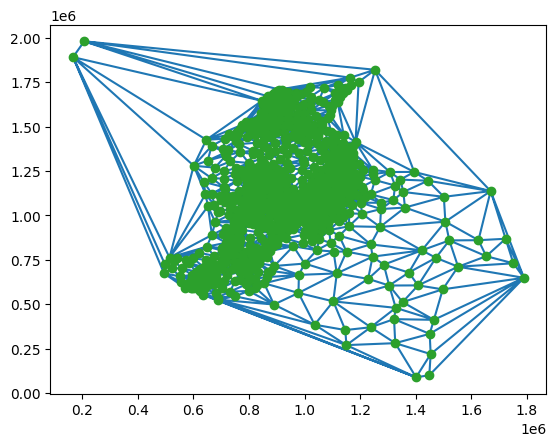

In [23]:
from scipy.spatial import Delaunay

# Extraer los centroides de los polígonos de los municipios en UTM
centroides = mun_col_crs.geometry.centroid

# Extrae las coordenadas x e y de los puntos
coords = np.column_stack((centroides.x, centroides.y))

# Aplica la Triangulación de Delaunay
tri = Delaunay(coords)

# Ahora puedes visualizar la triangulación
plt.triplot(coords[:,0], coords[:,1], tri.simplices.copy())
plt.plot(coords[:,0], coords[:,1], 'o')
plt.show()


## Ejercicio 07

Calcule y muestre el casco convexo para los puntos que se encuentran en el dataset.

In [ ]:
# Escriba su código aquí


## Ejercicio 08

Calcule la sumatoria de mínimos cuadrados para los puntos que se encuentran en el dataset.

In [ ]:
# Escriba su código aquí


## Ejercicio 09

Calcule el agrupamiento (cluster) de nivel tres para los puntos que se encuentran en el dataset.

In [ ]:
# Escriba su código aquí
